In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LinearRegression
import warnings
# To ignore the warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
np.random.seed(42)

# Loading Dataset

In [3]:
df = pd.read_csv("/kaggle/input/the-boston-houseprice-data/boston.csv")

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Preprocessing The Dataset

In [7]:
df['MEDV'].value_counts()

MEDV
50.0    16
25.0     8
23.1     7
22.0     7
21.7     7
        ..
12.6     1
16.4     1
17.7     1
12.0     1
8.1      1
Name: count, Length: 229, dtype: int64

In [8]:
df['MEDV'].isnull().value_counts()

MEDV
False    506
Name: count, dtype: int64

In [9]:
df['PTRATIO'].isnull().value_counts()

PTRATIO
False    506
Name: count, dtype: int64

In [10]:
df['LSTAT'].isnull().value_counts()

LSTAT
False    506
Name: count, dtype: int64

In [11]:
len(df)

506

In [12]:
df['RM'].isnull().value_counts()

RM
False    506
Name: count, dtype: int64

In [13]:
# count the num of null cells in each col 
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

# Exploratory Data Analysis

array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>,
        <Axes: title={'center': 'MEDV'}>, <Axes: >, <Axes: >]],
      dtype=object)

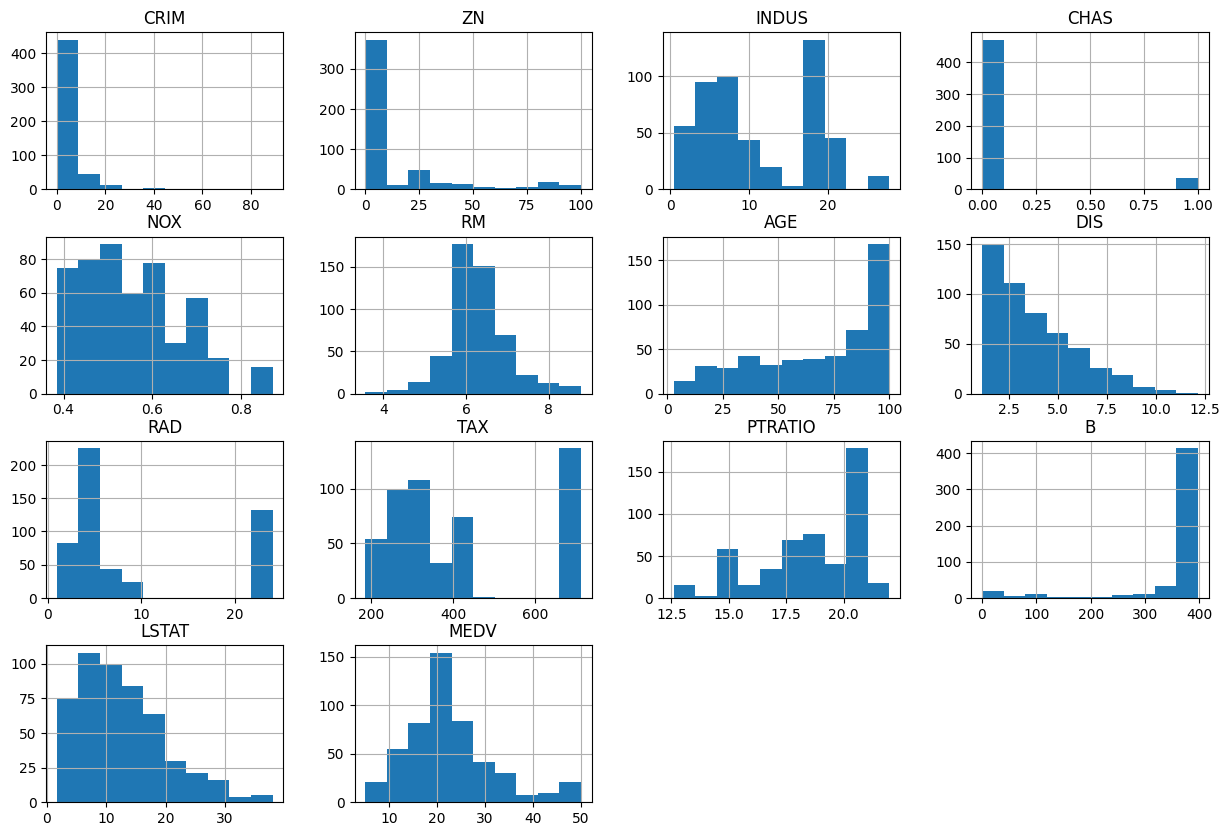

In [14]:
df.hist(figsize = (15, 10))

<Axes: >

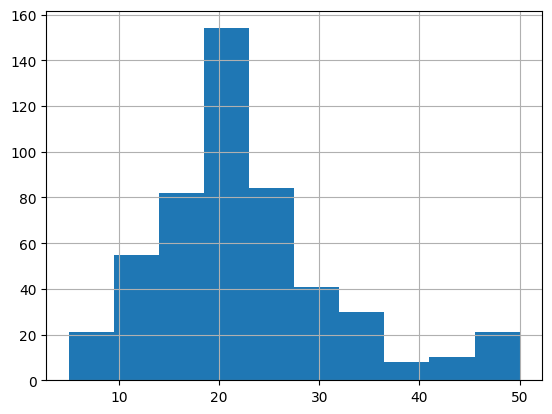

In [15]:
df['MEDV'].hist()

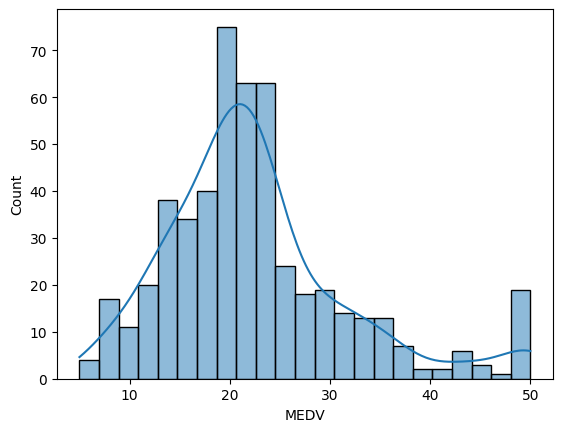

In [16]:
sns.histplot(df['MEDV'], kde = True)
plt.show()

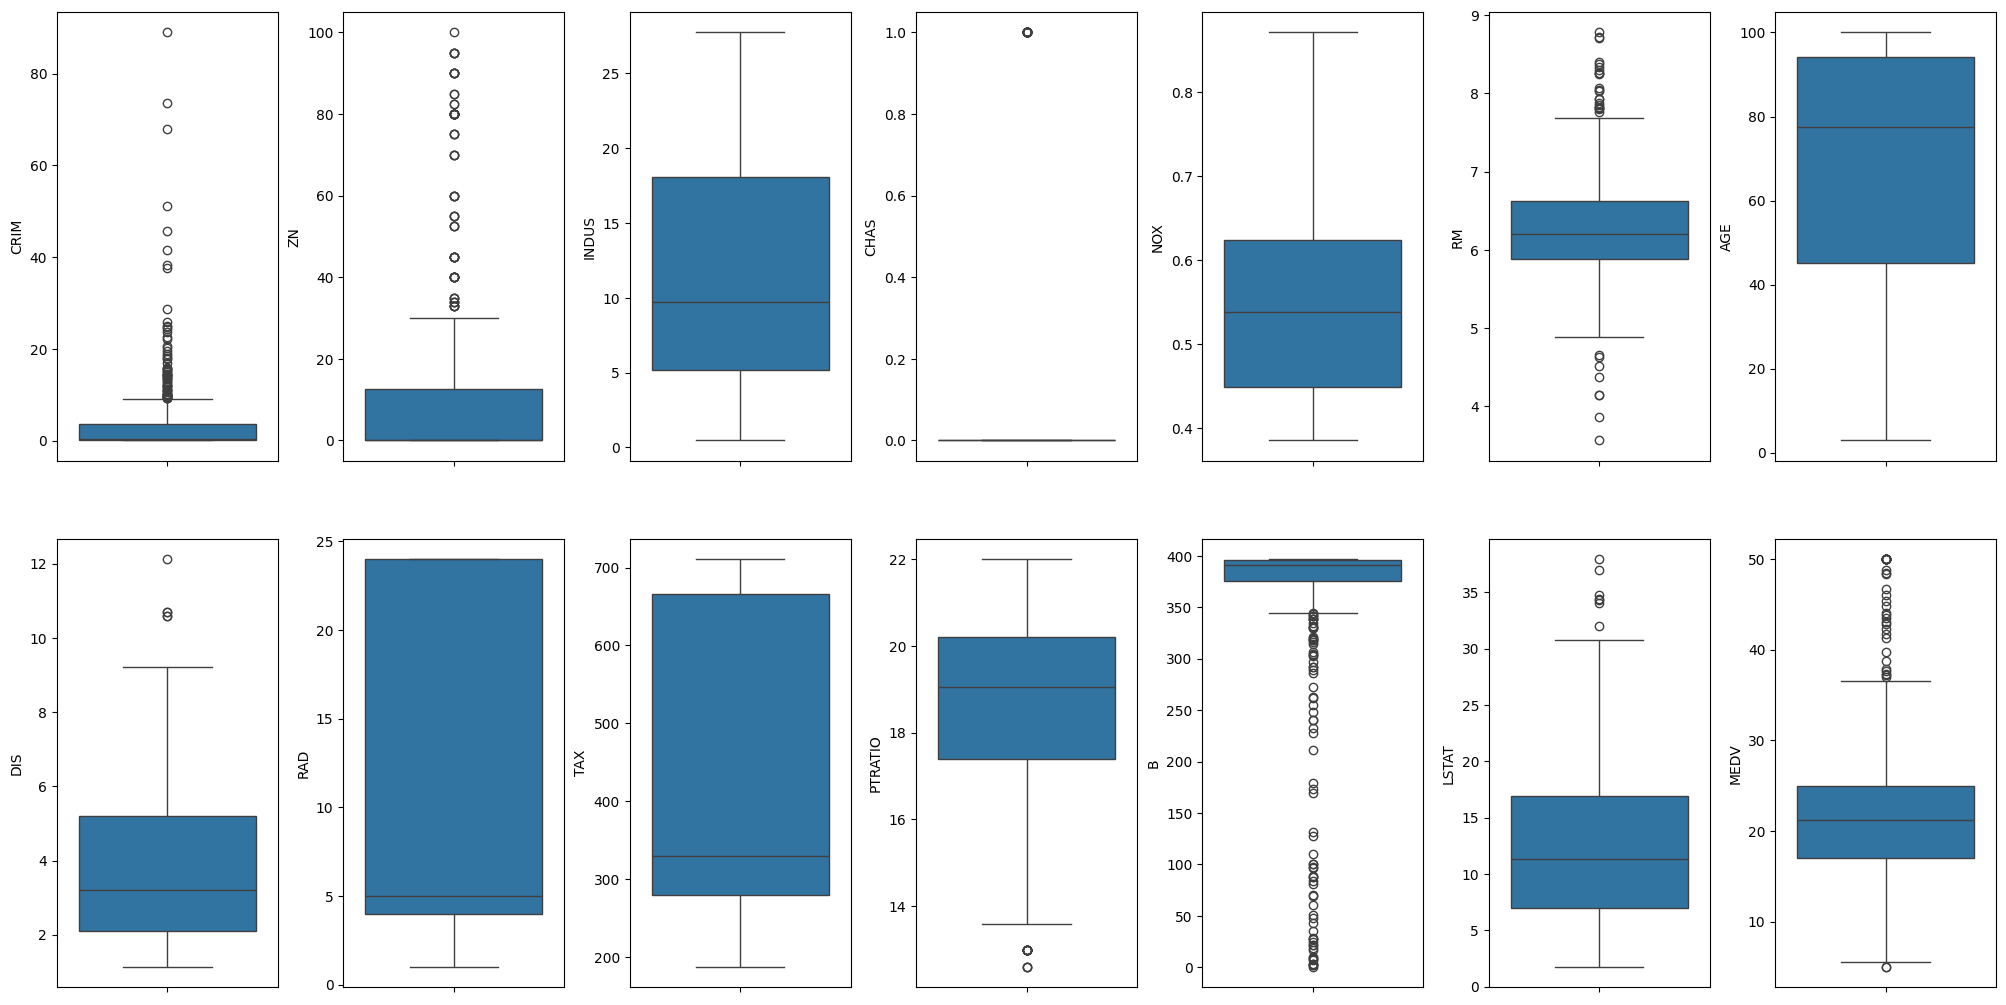

In [17]:
fig, ax = plt.subplots(ncols = 7, nrows = 2, figsize = (20, 10))
index = 0
ax = ax.flatten()

for col, _ in df.items():
    sns.boxplot(y = col, data = df, ax = ax[index])
    index += 1
plt.tight_layout(pad = 0.5, w_pad = 0.7, h_pad = 5.0)

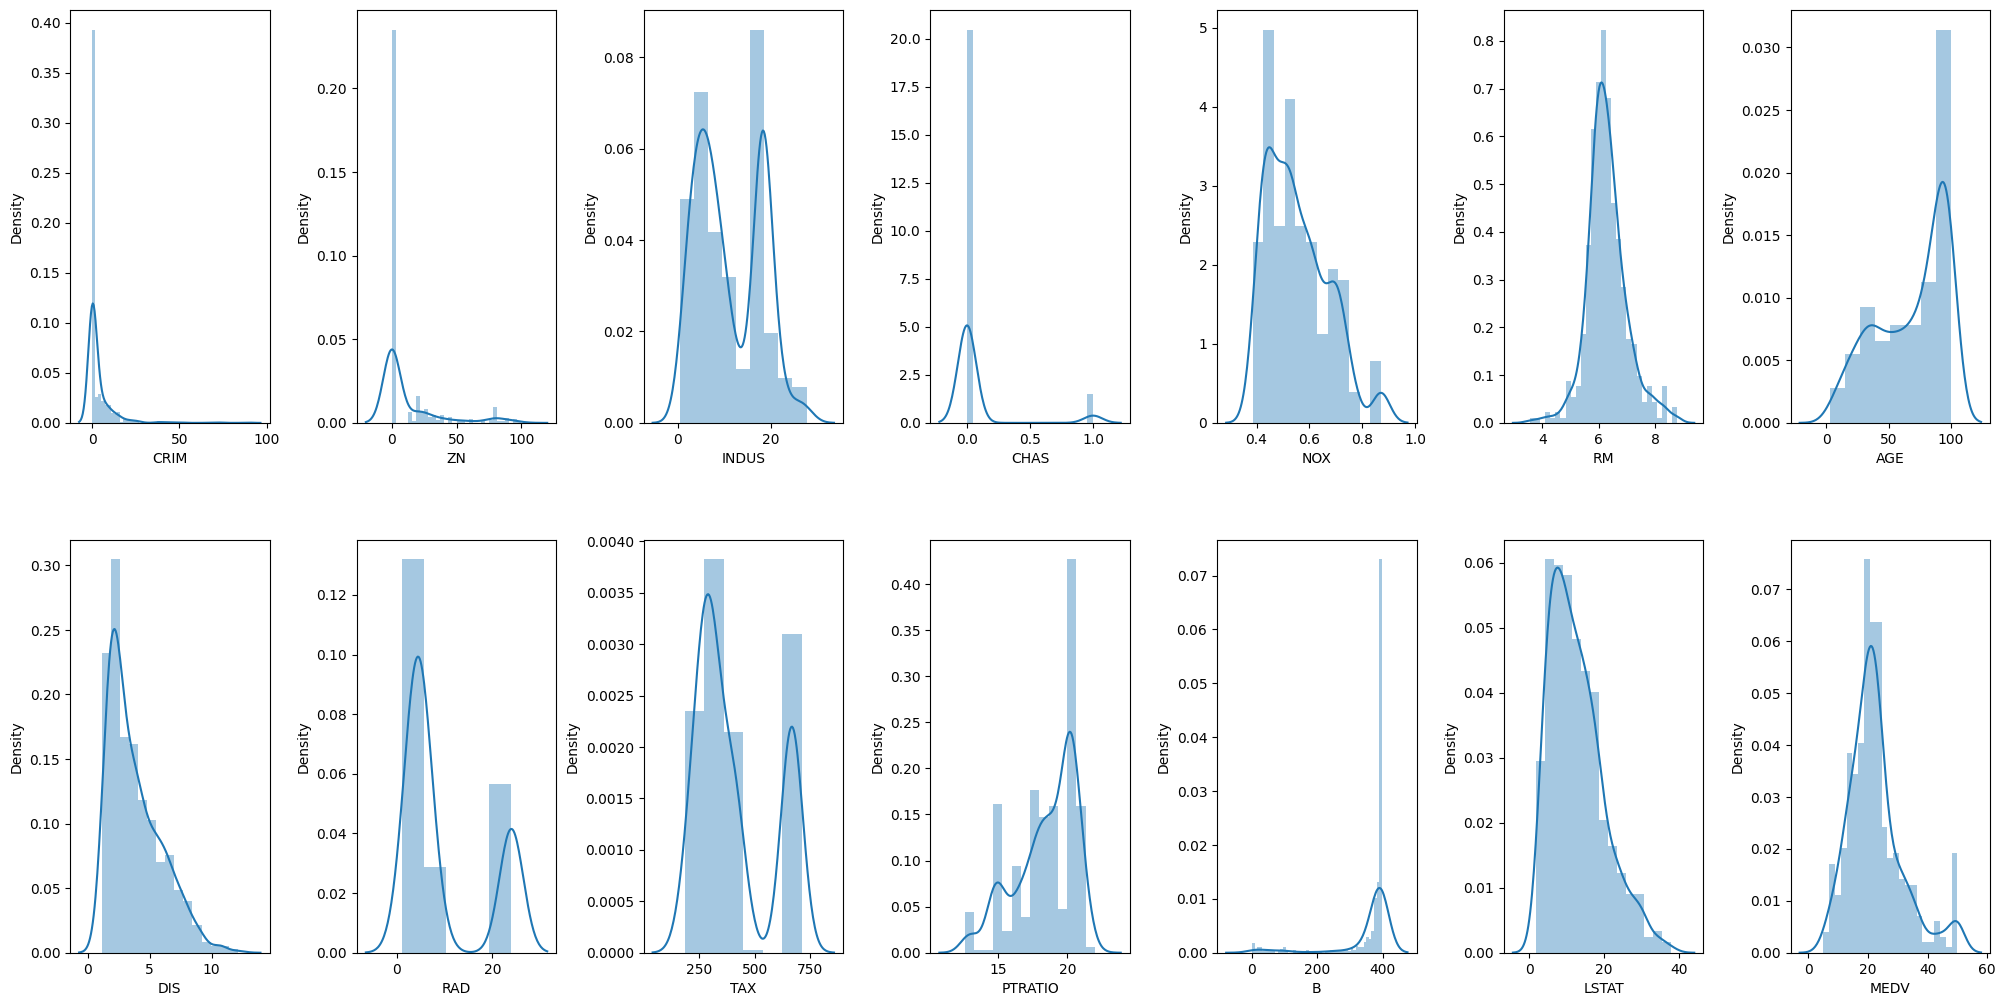

In [18]:
# Create dist plot
fig, ax = plt.subplots(ncols = 7, nrows = 2, figsize = (20, 10))
ax = ax.flatten()
index = 0

for col, val in df.items():
    sns.distplot(val, ax = ax[index])
    index += 1

plt.tight_layout(pad = 0.5, w_pad = 0.7, h_pad = 5.0)

In [19]:
# Min Max normalization
cols = ['CRIM', 'B', 'TAX', 'ZN']
for col in cols:
    minimum = min(df[col])
    maximum = max(df[col])
    df[col] = (df[col] - minimum) / (maximum - minimum)

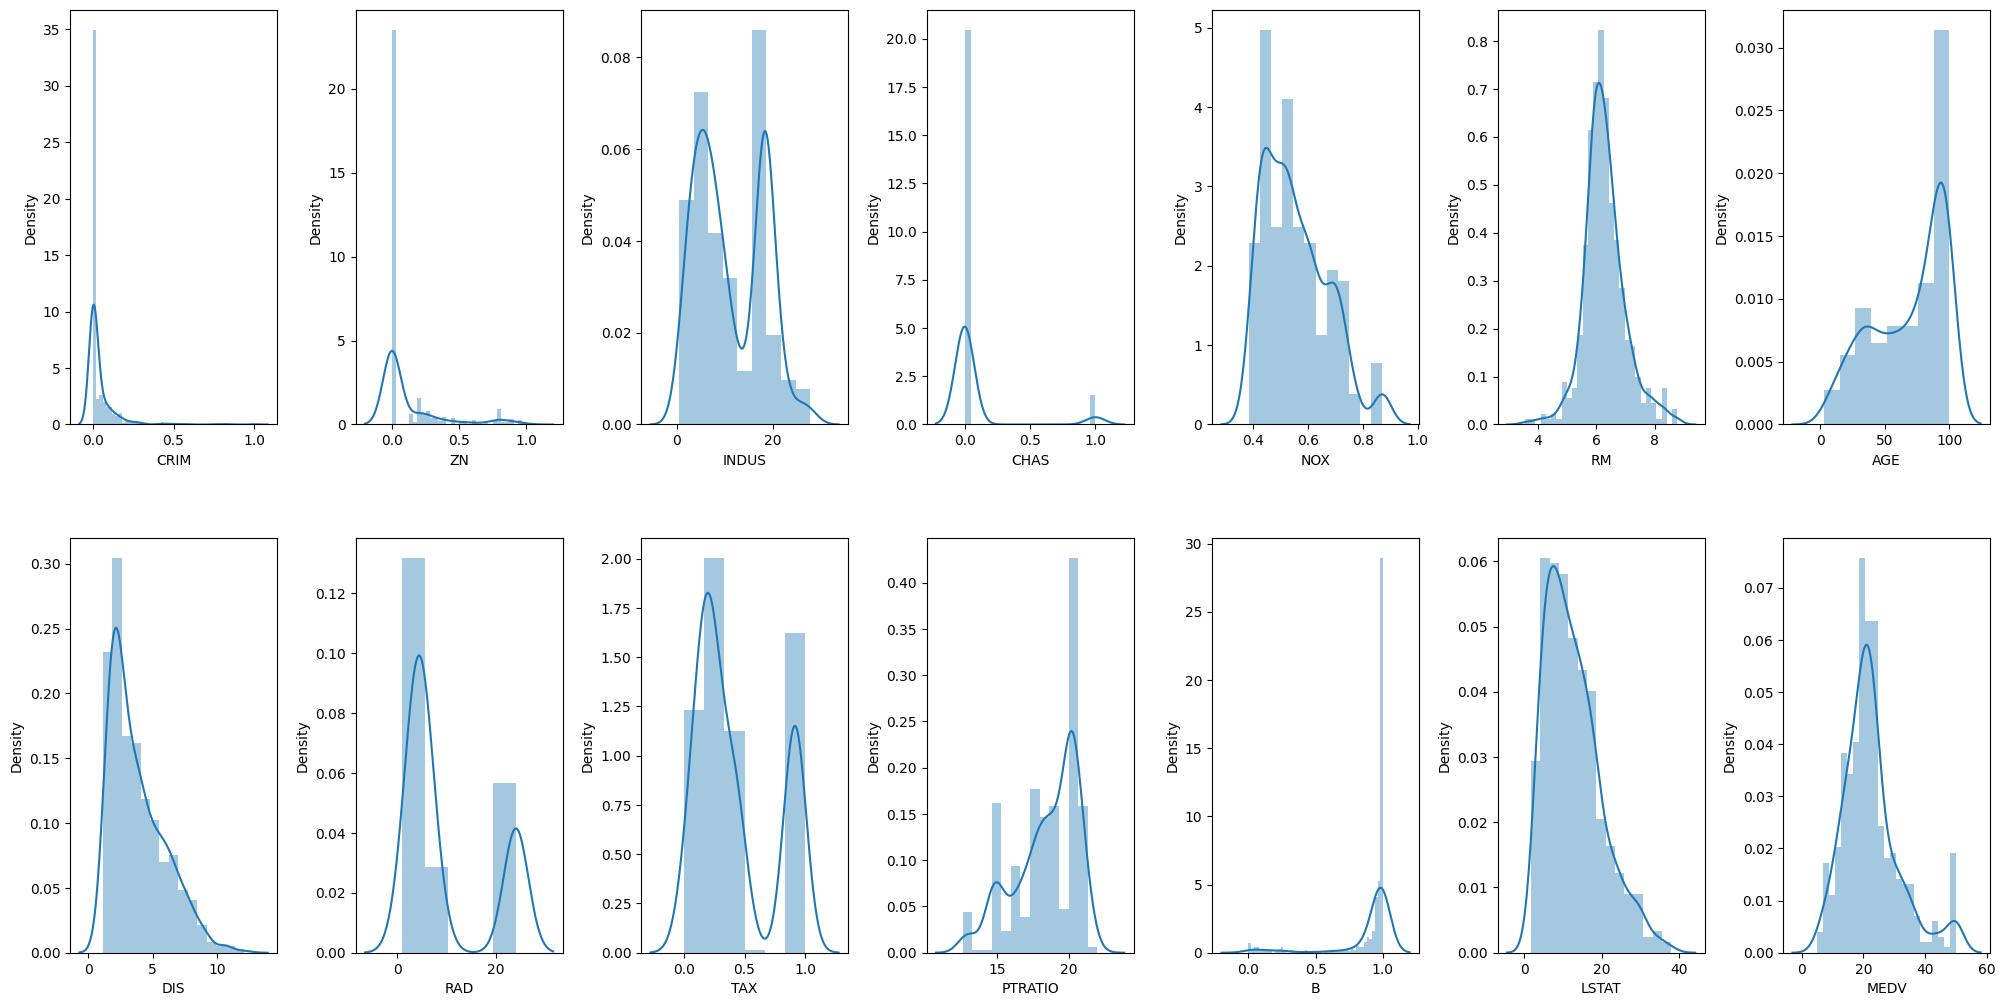

In [20]:
fig, ax = plt.subplots(ncols = 7, nrows = 2, figsize = (20, 10))
ax = ax.flatten()
index = 0

for col, value in df.items():
    sns.distplot(value, ax = ax[index])
    index += 1

plt.tight_layout(pad = 0.5, w_pad = 0.7, h_pad = 5)

In [21]:
from sklearn import preprocessing
scalar = preprocessing.StandardScaler()

scaled_cols = scalar.fit_transform(df[cols])
scaled_cols = pd.DataFrame(scaled_cols, columns = cols)
scaled_cols.head()

,CRIM,B,TAX,ZN
0,-0.419782,0.441052,-0.666608,0.284830
1,-0.417339,0.441052,-0.987329,-0.487722
2,-0.417342,0.396427,-0.987329,-0.487722
3,-0.416750,0.416163,-1.106115,-0.487722
4,-0.412482,0.441052,-1.106115,-0.487722


In [22]:
for col in cols:
    df[col] = scaled_cols[col]

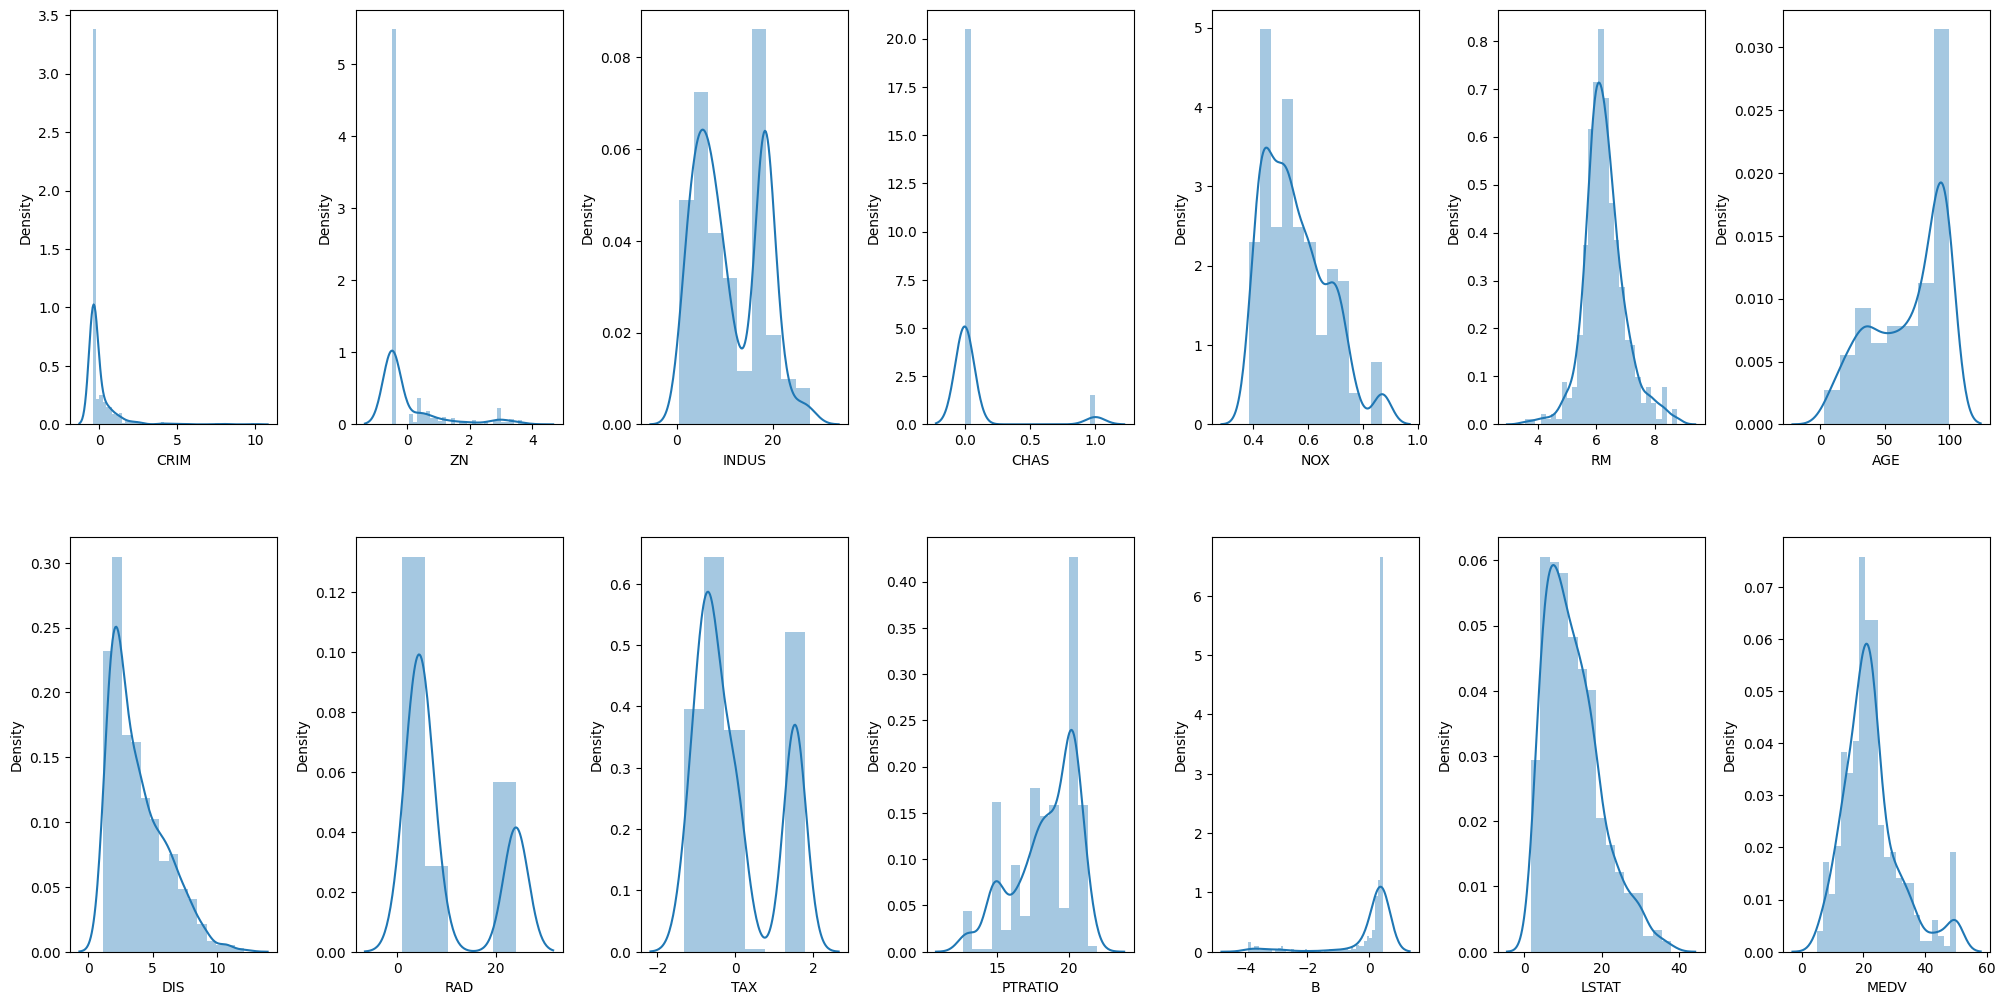

In [23]:
fig, ax = plt.subplots(ncols = 7, nrows = 2, figsize = (20, 10))
ax = ax.flatten()
index = 0

for col, value in df.items():
    sns.distplot(value, ax = ax[index])
    index += 1

plt.tight_layout(pad = 0.5, w_pad = 0.7, h_pad = 5)

# Correlation


<Axes: >

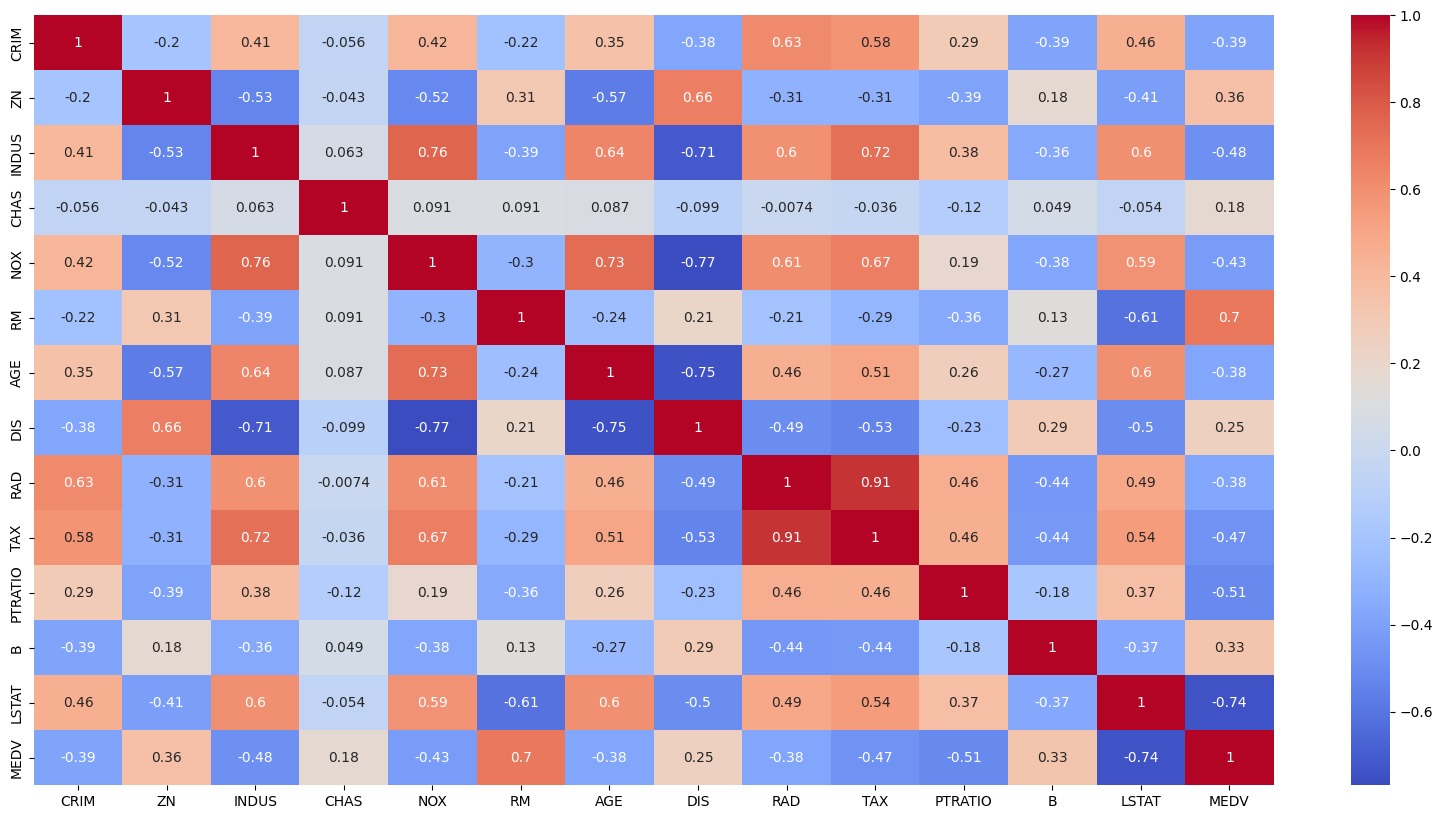

In [24]:
corr = df.corr()
plt.figure(figsize = (20, 10))
sns.heatmap(corr, annot = True, cmap = 'coolwarm')

<Axes: xlabel='RM', ylabel='MEDV'>

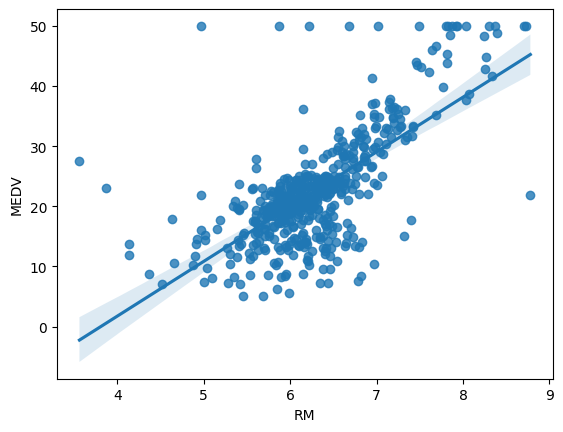

In [25]:
sns.regplot(y = df['MEDV'], x = df['RM'])

# Train Test Split

In [26]:
from sklearn.model_selection import train_test_split

X = df.drop(columns = ['MEDV', 'RAD'])
y = df['MEDV']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [37]:
print(np.isnan(X_train).sum(), np.isnan(y_train).sum())
print(np.isnan(X_test).sum(), np.isnan(y_test).sum())


CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64 0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64 0


# Model Training

In [28]:
# from sklearn.base import BaseEstimator, RegressorMixin

In [68]:
class BuildLinearRegression:
    def __init__(self, lr = 0.005, epochs = 1000):
        self.lr = lr
        self.epochs = epochs
        self.w = None
        self.b = 100

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0.09

        for _ in range(self.epochs):
            y_pred = X @ self.w + self.b

            dw = (2 / n_samples) * X.T @ (y_pred - y)
            db = (2 / n_samples) * np.sum(y_pred - y)

            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        return X @ self.w + self.b

In [69]:
# from sklearn.model_selection import cross_val_score, train_test_split
# from sklearn.metrics import mean_squared_error

# def train(model, X, y):
#     X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)

#     cv_score = cross_val_score(model, X, y, scoring = 'neg_mean_squared_error', cv = 5)
#     cv_score = np.abs(np.mean(cv_score))

#     print("Model Report")
#     print("MSE: ", mean_squared_error(y_test, y_pred))
#     print("CV Score: ", cv_score)

In [70]:
from sklearn.linear_model import LinearRegression
model = BuildLinearRegression()
# train(model, X, y)
model.fit(X_train, y_train)

In [71]:
# coeff = pd.Series(model.coef_, X.columns).sort_values()
# coeff.plot(kind = 'bar', title = 'Model coefficients')
y_pred = model.predict(X_test)

In [72]:
mse = np.mean((y_test - y_pred) ** 2)

In [76]:
np.sqrt(mse)

np.float64(6.592767566739576)

In [74]:
y_test

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
441    17.1
23     14.5
225    50.0
433    14.3
447    12.6
Name: MEDV, Length: 152, dtype: float64

In [75]:
y_pred

173    26.277647
274    28.782050
491    18.453811
72     24.302050
452    20.073022
         ...    
441    18.349807
23     21.408977
225    34.137978
433    20.003405
447    21.027265
Length: 152, dtype: float64